# Kunskapskontroll 2 

### Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: Anton Grigoriev 

# Task

Använd maskininlärning för att modellera MNIST datan. Du skall utvärdera minst två olika modeller i ditt arbete och göra ett komplett ML-flöde, från början där du laddar in data till slut där du utvärderar den bäst valda modellen på din test data.


**ML-flöde:**
1. A short EDA (Exploratory Data Analysis) of the MNIST data set.
2. Split your data into train, validation and test set.


**Supervised learning:**

3. Create  "Random Forest",  "ExtraTrees" and "LinearSVC".
4. Combine in "VotingClassifier".
5. Use GridSearchCV to optimize the best model. 
6. Evaluate your chosen model on a real images.


**Unsupervised learning:**

7. GaussianMixture.

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Downloading the data and inspecting it

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

//anaconda3/envs/testmojave/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

## EDA

In [21]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

5


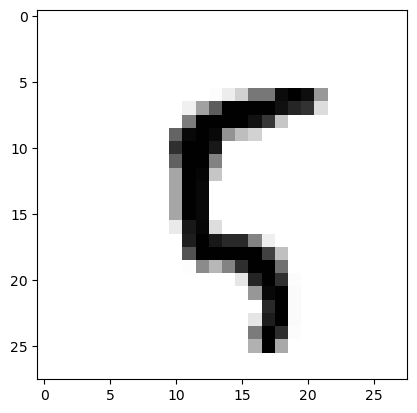

In [26]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[100]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
print(y[100])

## Split your data into train and test set.

In [3]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

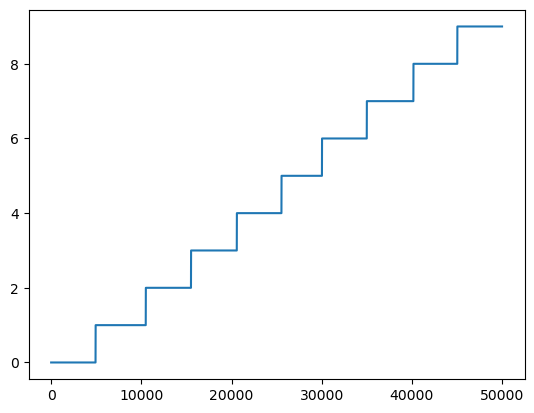

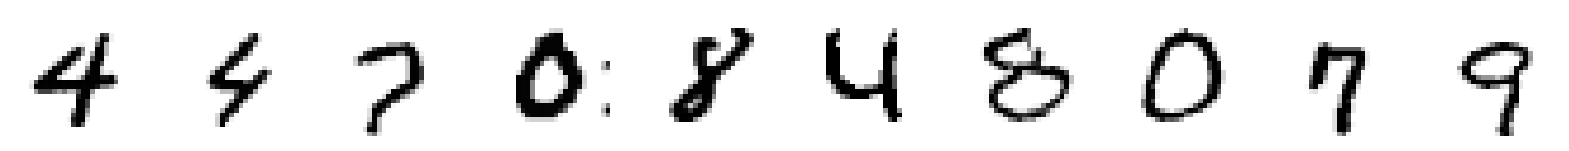

In [40]:
plt.plot(np.sort(y_train))
num_examples = 10
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
    plt.axis('off')
plt.show()
#from the size of the steps we see, that all digits are equally represented
#from images we see grayscale present, not just black and white

# Models "Random Forest",  "ExtraTrees" and "LinearSVC".

In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

for my_model_name in {random_forest_clf, extra_trees_clf,  svm_clf}:
    my_model_name.fit(X_train, y_train)
    print(my_model_name.score(X_val, y_val))

0.859
0.9715
0.9692


In [33]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf)
]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
print(voting_clf.score(X_val, y_val))

0.9693


# Conclusion on "VotingClassifier"

In [41]:
# score of our "best" models on test data 
print(extra_trees_clf.score(X_test, y_test))
print(svm_clf.score(X_test, y_test))
print(random_forest_clf.score(X_test, y_test))

0.9691
0.8566
0.9645


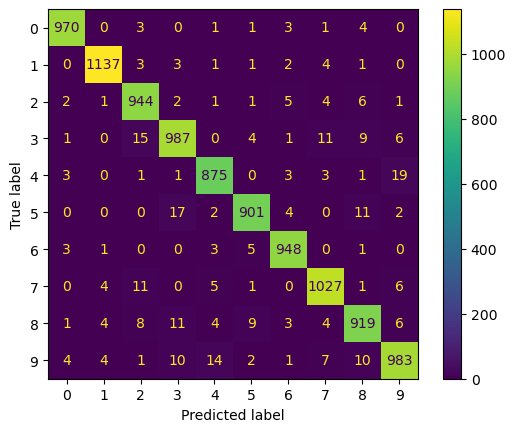

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_test = extra_trees_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot()

In [36]:
# can be compared to 
print(voting_clf.score(X_test, y_test))

0.965


Extraa trees does better all alone. So we can drop voting and optimize Extra trees instead. Note that GridsearchCV-optimized SVC with .939

# GridsearchCV for ExtraTrees

In [48]:
parameters = [                           
              {     
                   "n_estimators": [100, 200],  
                   "criterion": ["entropy", "gini"],
                   "max_depth": [2, 5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5, 8],
                   "min_samples_split": [2, 3, 5], 
                   "class_weight": [None, "balanced", {0: 1, 1: 3}, {0: 1, 1: 5}]               
                 }
              ]

grid_search = GridSearchCV(extra_trees_clf, param_grid=parameters, scoring="accuracy",n_jobs=6)

grid_search.fit(X_train, y_train)

print(f"Best parameters : \n\n{grid_search.best_params_}")

Best parameters : 

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [172]:
#I should have calles different GsCV models differntly, instead of overwriting.
extra_trees_clf_200 = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=6, class_weight='balanced',criterion='entropy',max_depth=10, max_features='sqrt')
extra_trees_clf_200.fit(X_train, y_train)
#print(grid_search_200.score(X_train, y_train),grid_search.score_200(X_val, y_val),grid_search_200.score(X_test, y_test))
print(extra_trees_clf_200.score(X_train, y_train),extra_trees_clf_200.score(X_val, y_val),extra_trees_clf_200.score(X_test, y_test))


0.95976 0.9417 0.9384


In [51]:
parameters = [                           
              {     
                   "n_estimators": [200, 300],  
                   "criterion": ["entropy"],
                   "max_features": ["sqrt"], 
                   "class_weight": ["balanced"]               
                 }
              ]

grid_search = GridSearchCV(extra_trees_clf, param_grid=parameters, scoring="accuracy",n_jobs=6)

grid_search.fit(X_train, y_train)

print(f"Best parameters : \n\n{grid_search.best_params_}")

Best parameters : 

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 300}


In [53]:
print(grid_search.score(X_test, y_test))

0.968


In [132]:
parameters = [                           
              {     
                   "n_estimators": [400, 600],  
                   "criterion": ["entropy", "gini"],
                   "max_features": ["log2", "sqrt"], 
                   "class_weight": [None, "balanced", "balanced_subsample"]               
                 }
              ]

grid_search = GridSearchCV(extra_trees_clf, param_grid=parameters, scoring="accuracy",n_jobs=6)

grid_search.fit(X_train, y_train)

print(f"Best parameters : \n\n{grid_search.best_params_}")
print(grid_search.score(X_test, y_test))

Best parameters : 

{'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 600}
0.97


In [55]:
extra_trees_clf_400 = ExtraTreesClassifier(n_estimators=400, random_state=42, n_jobs=6)
extra_trees_clf_400.fit(X_train, y_train)
print(extra_trees_clf_400.score(X_test, y_test))

0.9706


In [56]:
extra_trees_clf_1000 = ExtraTreesClassifier(n_estimators=1000, random_state=42, n_jobs=6)
extra_trees_clf_1000.fit(X_train, y_train)
print(extra_trees_clf_1000.score(X_test, y_test))

0.9699


# Test on real images

[3]


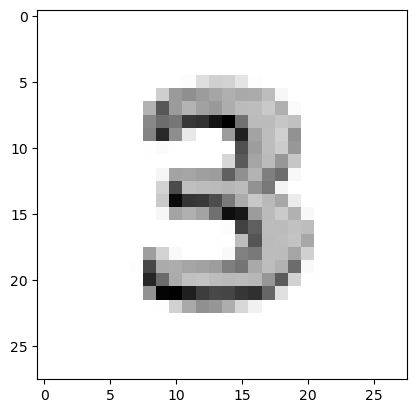

In [84]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )
img_read =plt.imread('3.webp')
img = np.dot(rgba2rgb(img_read), [0.299 , 0.587, 0.114])
n, m = img.shape
window_n=n//28
window_m=m//28
#print(window_n,window_m)
n, m = n - n % window_n, m - m % window_m
img1 = np.zeros((28,28))
X_job = np.zeros((1,28*28))
ind = 0
for x in range(0, n, window_n):
    for y in range(0, m, window_m):
        threshold = img[x:x+window_n,y:y+window_m].mean() 
        img1[x//window_n,y//window_m] = 255 - threshold
        X_job[0,ind] = 255 - threshold
        ind = ind + 1
plt.imshow(img1, cmap=mpl.cm.binary)
print(extra_trees_clf_400.predict(X_job))

229.99999999999997
[5]


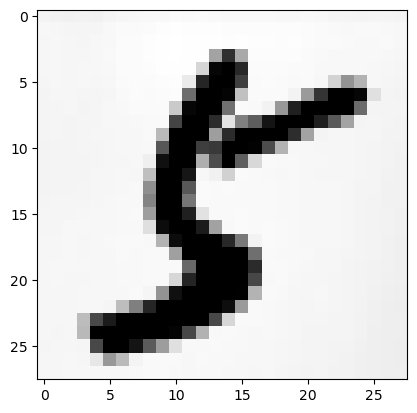

In [131]:
img_read =plt.imread('5prick.jpg')
img = np.dot(rgba2rgb(img_read), [0.299 , 0.587, 0.114])
n, m = img.shape
window_n=n//28
window_m=m//28
print(img.max())
n, m = n - n % 28, m - m % 28
img1 = np.zeros((28,28))
X_job = np.zeros((1,28*28))
ind = 0
for x in range(0, n, window_n):
    for y in range(0, m-1, window_m):
        threshold = img[x:x+window_n,y:y+window_m].mean() 
        img1[x//window_n,y//window_m] = 255 - threshold
        X_job[0,ind] = 255 - threshold
        ind = ind + 1
plt.imshow(img1, cmap=mpl.cm.binary)
print(extra_trees_clf_400.predict(X_job))

# Save the model

In [167]:
#save the model
import bz2file as bz2
import pickle

# save
with bz2.BZ2File('model.pbz2','wb') as f:
    pickle.dump(extra_trees_clf_400,f)
    
# load
#data_f = bz2.BZ2File('model.pbz2', ‘rb’)
#extra_trees_clf_400 = pickle.load(data_f)


In [173]:
with bz2.BZ2File('model_200.pbz2','wb') as f:
    pickle.dump(extra_trees_clf_200,f)

# GaussianMixture

In [135]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 10)
klassifikation = model.fit(X_train).predict(X_train)
prediktion = model.predict(X_test)


[0 5 5 6 5 9 7 3 7 4] [5 5 4 6 7 9 4 5 8 9]


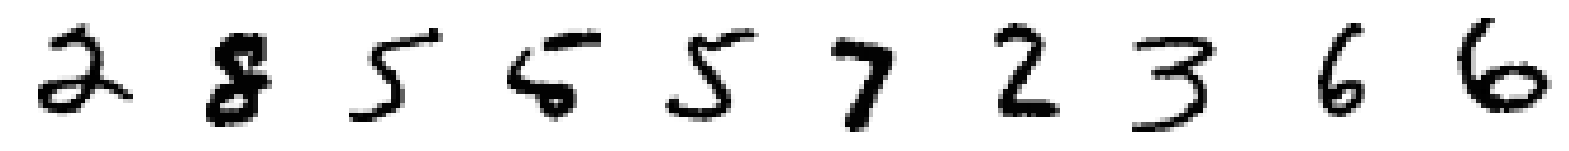

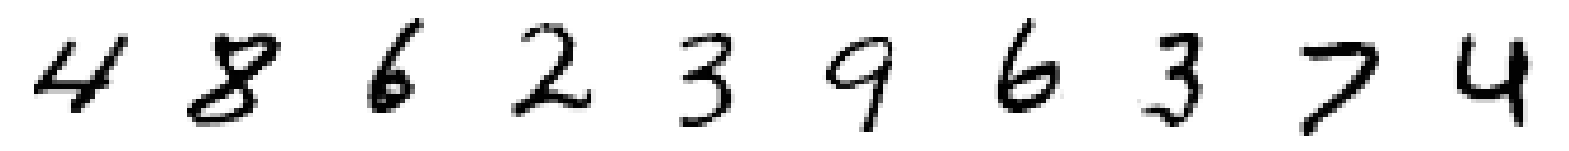

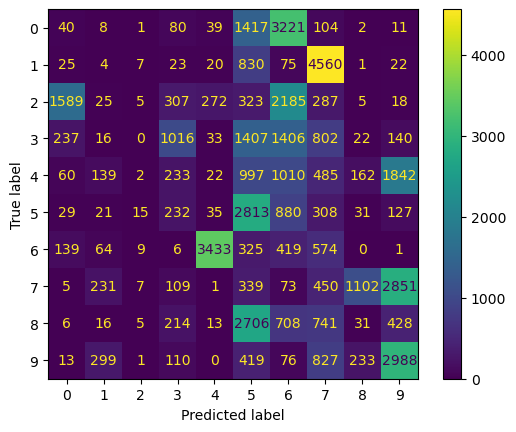

In [155]:
num_examples = 10
start_examples = 500
print(klassifikation[start_examples:start_examples + num_examples],prediktion[start_examples:start_examples + num_examples])
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_train[start_examples + i].reshape(28, 28), cmap='Greys')
    plt.axis('off')
plt.show()
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_test[start_examples + i].reshape(28, 28), cmap='Greys')
    plt.axis('off')
plt.show()
cm = confusion_matrix(y_train, klassifikation)
ConfusionMatrixDisplay(cm).plot()

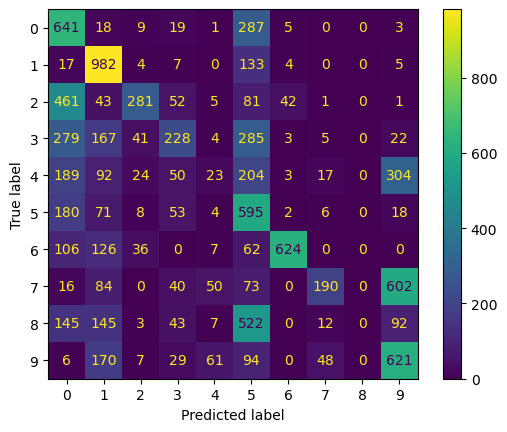

In [165]:
prediction_labled = [] 
for x in prediktion :
    if x == 6:
        prediction_labled.append(0)
    if x == 7:
        prediction_labled.append(1)
    if x == 0:
        prediction_labled.append(2)
    if x == 3:
        prediction_labled.append(3)
    if x == 1:
        prediction_labled.append(4)
    if x == 5:
        prediction_labled.append(5)
    if x == 4:
        prediction_labled.append(6)
    if x == 8:
        prediction_labled.append(7)
    if x == 2:
        prediction_labled.append(8)
    if x == 9:
        prediction_labled.append(9)
        
        
cm = confusion_matrix(y_test, prediction_labled)
ConfusionMatrixDisplay(cm).plot()

In [166]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, prediction_labled)
print(f'Accuracy Score: {acc}')

Accuracy Score: 0.4185


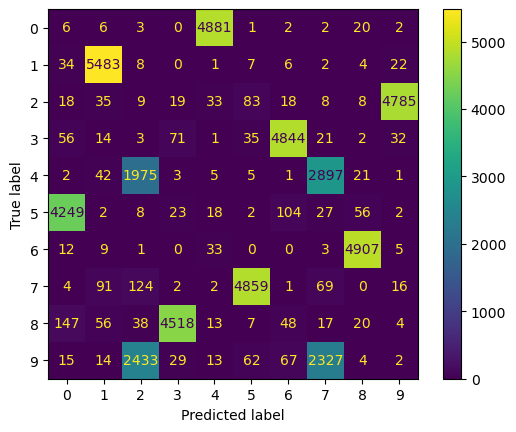

In [6]:
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tsne = TSNE(n_components=3, n_jobs=6, random_state=42)
X_train_cut = tsne.fit_transform(X_train)
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 10)
klassifikation = model.fit(X_train_cut).predict(X_train_cut)
cm = confusion_matrix(y_train, klassifikation)
ConfusionMatrixDisplay(cm).plot()


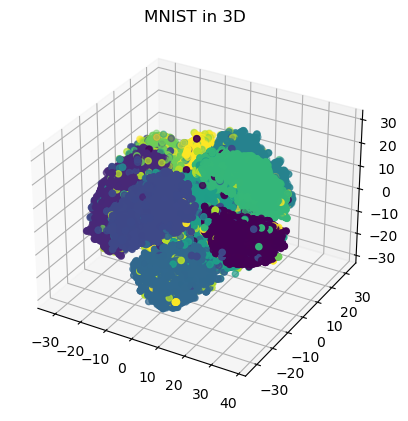

In [17]:
### fig = px.scatter_3d(X_train_cut, x='x', y='y', z='z', color=y_train, hover_data=['label'])
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_train_cut[:,0],X_train_cut[:,1],X_train_cut[:,2], c=y_train)
plt.title("MNIST in 3D")
 
# show plot
plt.show()

Accuracy Score: 0.87712


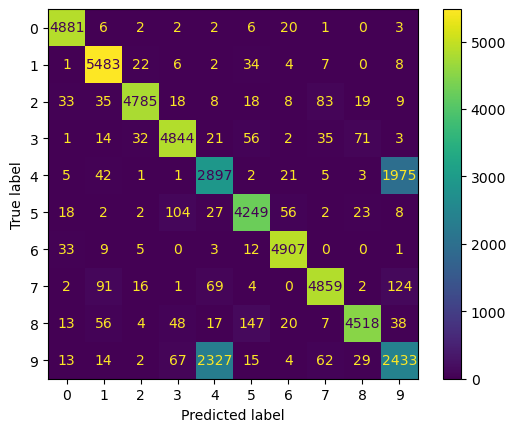

In [10]:
klassifikation_labled = [] 
for x in klassifikation :
    if x == 4:
        klassifikation_labled.append(0)
    if x == 1:
        klassifikation_labled.append(1)
    if x == 9:
        klassifikation_labled.append(2)
    if x == 6:
        klassifikation_labled.append(3)
    if x == 7:
        klassifikation_labled.append(4)
    if x == 0:
        klassifikation_labled.append(5)
    if x == 8:
        klassifikation_labled.append(6)
    if x == 5:
        klassifikation_labled.append(7)
    if x == 3:
        klassifikation_labled.append(8)
    if x == 2:
        klassifikation_labled.append(9)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, klassifikation_labled)
print(f'Accuracy Score: {acc}')
cm = confusion_matrix(y_train, klassifikation_labled)
ConfusionMatrixDisplay(cm).plot()